# Project 1

## Step 1: Load the data and perform basic operations.

##### 0. Import necessary packages and set aliases

In [1]:
# In addition to importing packages as their aliases, we will configure our charts
# to load within the notebook itself and at twice the default resolution.

from math import sqrt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

##### 1. Load the data in using pandas.

In [2]:
# In accordance with PEP 8, variable names are kept in lowercase despite being acronyms.

act = pd.read_csv('../data/act.csv')
sat = pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [3]:
# So as to bask in the beauty inherent to the dataframe structure, we will use IPython's display function
# in place of print(). This preserves the visual formating that can be seen when just viewing a dataframe
# as output in a Jupyter Notebook.

# Slicing efficiently yields the cells in question (index values 0 up to, but not including, 10)
display(act[:10])
display(sat[:10])

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

##### Columns common to both data sets:
    Far left column -- Dataframe index values generated when the datasets were loaded by pandas.
    'Unnamed:0' -- Like many .csv files, both sets came with their own indices as well. In
            our case the column is superfluous and can be dropped.
    'State' -- The state from which the data in the following cells was gathered. Washington
            D.C. gets its own row in both datasets and the ACT set kicks off with an national
            aggregate as well.
    'Participation' -- The percentage of high school seniors ('17) who took the exam.
##### ACT specific columns:
    'English, Math, Reading, Science' -- All of these columns contain scores in their respective
            disciplines in the range of 1 and 36 (the higher scores being better). The values
            are scaled from the raw score (a basic count of correct answers in a given section)
            to normalize the data over all dates the test is administered. To be explicit, this
            is not the same as weighting.
    'Composite' -- The values in this column are simply the means of their respective subsection
            scores.
##### SAT specific columns
    'Evidence Based Reading and Writing & Math' -- These columns, like their ACT counterparts,
            are scores that have been scaled from raw data to account for different tests
            administered on different dates. Unlike the ACT, the scores are in the range of
            200 to 800 (higher being better).
    'Total' -- Self-explanatory, the total column is the sum of the EBRW and math scores. Since
            the parts being added were already averages, the sum naturally represents a mean. It
            is worth including that none of the included scores (including in the total column)
            consider the essay portions of either test.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [4]:
# As mentioned, the original indicies from the .csv are rendered obsolete since pands
# assigns its own index values by default. Here we will drop the superflous columns.

act.drop(columns='Unnamed: 0', inplace=True)
sat.drop(columns='Unnamed: 0', inplace=True)

In [5]:
# The percentage symbol in the participation columns will prevent us from performing analysis
# with/on that column. To permit the 'Participation' columns to participate, we format the
# strings. With str.replace(), the sign is easily done away with, and we can typecast the
# values as integers using astype().

act['Participation'] = act['Participation'].str.replace('%', '').astype(int)
sat['Participation'] = sat['Participation'].str.replace('%', '').astype(int)

Using .info() on both sets, we can see that the data is almost entirely intact and complete. With .describe() we can see at a glance that the ACT boasts higher participation in general (means and quartile percentages are all a cut above the SAT's corresponding values. The fact that the ACT set has a national aggregate included as a row slightly changes the outcome, but not substantially enough to change the conclusion. The two major discrepancies are with Maryland's SAT Math average which is below the minimum possible value of 200 at 52 and also its ACT Science average which is far below any other average score for any section and state. Checking the values against the established set on the prep scholar blog, we see that the intended value is in fact 524 for the SAT score and 23.2 for the ACT score.

In [6]:
# Correct improper SAT and ACT values for Maryland
sat['Math'].replace(52, 524, inplace=True)
act['Science'].replace(2.3, 23.2, inplace=True)

In [7]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [8]:
act.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.442308,21.509615
std,31.832518,2.332132,1.963602,2.048672,1.723351,2.002083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,31.000000,19.000000,19.400000,20.475000,19.975000,19.800000
50%,68.000000,20.550000,20.900000,21.700000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.125000,23.200000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [9]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [10]:
sat.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


The participation values in both sets included a percentage sign which resulted in the datatype for those columns to be counted as mere objects. Having since resolved that, as well as the math score hiccup, I would say that the data is clean and complete, if perhaps a tad sparse. I would love to have more information such as an 'n' value for each row.

##### 5. Print the types of each column.

In [11]:
# Print the datatypes of the columns in the ACT dataset
act.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [12]:
# Print the datatypes of the columns in the SAT dataset
sat.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Way ahead of you


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [13]:
# The fastest and easiset solution I found was to use pandas' .to_dict() method, however instead of
# using it on the dataframes themselves, I had an easier time generating specialized series from which
# to build the dictionaries.

# ACT dictionary creation
act_eng = pd.Series(act['English'].values, index = act['State']).to_dict()
act_math = pd.Series(act['Math'].values, index = act['State']).to_dict()
act_read = pd.Series(act['Reading'].values, index = act['State']).to_dict()
act_sci = pd.Series(act['Science'].values, index = act['State']).to_dict()
act_tot = pd.Series(act['Composite'].values, index = act['State']).to_dict()

# SAT dictionary creation
sat_ebrw = pd.Series(sat['Evidence-Based Reading and Writing'].values, index = sat['State']).to_dict()
sat_math = pd.Series(sat['Math'].values, index = sat['State']).to_dict()
sat_tot = pd.Series(sat['Total'].values, index = sat['State']).to_dict()

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [14]:
# Using a list comprehension, we can map the column names to an iterable of corresponding values

act_dict = {c: list(act[c]) for c in act.columns}
sat_dict = {c: list(sat[c]) for c in sat.columns}

##### 9. Merge the dataframes on the state column.

In [15]:
# Before doing a merge, it can be helpful to alter the column names of each dataframe to make them
# unique. This prevents a messy name-collision that has to be cleaned up later. This also presents
# a nice opportunity to rename the overly long column title for the SAT's reading and writing section
# to something less obnoxious. Finally, it is worth noting that while the ACT's 'Reading', 'Science',
# and 'Composite' categories are uniquely named, that does not mean they are sufficiently descriptive
# to not need renaming. To make the joined dataframe cogent, all titles for numerical columns will
# have their respective exams prepended.

# ACT column renaming
act.rename(columns={'Participation':'ACT Participation',
                    'English':'ACT English',
                    'Math':'ACT Math',
                    'Reading':'ACT Reading',
                    'Science':'ACT Science',
                    'Composite':'ACT Composite'
                   }, inplace=True)

# SAT column renaming
sat.rename(columns={'Participation':'SAT Participation',
                    'Evidence-Based Reading and Writing':'SAT Reading and Writing',
                    'Math':'SAT Math',
                    'Total':'SAT Total'
                   }, inplace=True)

In [16]:
# One of the effects of this merge is the loss of the national aggregate row from the ACT dataset.
# Initially my plan was to preserve the row and extrapolate the values for the SAT columns, however
# this would only work if the ACT's aggregate values were simple means of the rest of the values.
# To test whether or not this was the case, I summed the column values, subtracted the 'National'
# value, and took a mean. It was immediately apparent that the 'National' row did not work this way.
# Perhaps it took into account the actual number of test takers per state which was not included with
# our datasets. In any case, it is reasonable to conclude that any extrapolation on the the SAT set
# to fill in related values would cause a methodological asymmetry, thereby invalidating any comparative
# metrics between the two. On the bright side, the data would have been far less meaningful if the
# 'National' values were, in fact, simple means.

# Merge ACT and SAT dataframes on the 'State' column
exam_data = pd.merge(act, sat, on='State')

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

Whoops

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [17]:
# To print only the requested metrics to standard output:
# print('Minimums:\n', exam_data.min(), '\n')
# print('Maximums:\n', exam_data.max())

# To print the requested metrics *and more* within a single dataframe
display(exam_data.describe())

,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [18]:
# This function replicates the functionality of np.std() with ddof set to 0. We want this because
# we are working with a population rather than a sample. It does use a loop as list comprehensions
# are inherently loops, however I presume it falls within the acceptable boundaries of the assignment.

def stddev(lst):
    '''return standard deviation of lst'''
    n = len(lst) # the number of values in lst
    m = np.mean(lst) # the mean value of lst
    variance = sum([(x - m) ** 2 for x in lst]) / n # the variance of a population mean
    return(sqrt(variance)) # standard deviation of lst

In [19]:
# It seemed more appropriate to map the standard deviations per column to a dictionary rather than a
# list so that the referrent of the data would be clear down the line. If it becomes an issue, a list
# can easily be generated from just the values when it is necessary.

# Excepting the first column of exam_data which is non-numeric ('State'), this list comp maps the
# standard deviation of each column to the column title in a dictionary.
sd = {c: stddev(exam_data[c]) for c in exam_data.columns[1:]}

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

It wouldn't really be helpful to just have a single value run down every row for each numeric column. Adding sd as a row entry is also not appropriate as it is not any of the things that are described by the existing column headers. Mark P. helpfully suggested that the columns should instead contain how many standard deviations each value is from the population mean. The forumla is as follows: $$z = (X - \mu)/\sigma$$

where z is the number of standard deviations from the average X is from the mean (mu). The standard deviation itself is sigma.

In [20]:
# Generating the z-score columns, again with ddof = 0 
exam_data['ACT Participation SD'] = stats.zscore(exam_data['ACT Participation'])
exam_data['ACT English SD'] = stats.zscore(exam_data['ACT English'])
exam_data['ACT Math SD'] = stats.zscore(exam_data['ACT Math'])
exam_data['ACT Reading SD'] = stats.zscore(exam_data['ACT Reading'])
exam_data['ACT Science SD'] = stats.zscore(exam_data['ACT Science'])
exam_data['ACT Composite SD'] = stats.zscore(exam_data['ACT Composite'])
exam_data['SAT Participation SD'] = stats.zscore(exam_data['SAT Participation'])
exam_data['SAT Reading and Writing SD'] = stats.zscore(exam_data['SAT Reading and Writing'])
exam_data['SAT Math SD'] = stats.zscore(exam_data['SAT Math'])
exam_data['SAT Total SD'] = stats.zscore(exam_data['SAT Total'])

In [21]:
# Reordering columns so z-scores are next to their related values
exam_data = exam_data[['State',
          'ACT Participation', 'ACT Participation SD',
          'ACT English', 'ACT English SD',
          'ACT Math', 'ACT Math SD',
          'ACT Reading', 'ACT Reading SD',
          'ACT Science', 'ACT Science SD',
          'ACT Composite', 'ACT Composite SD',
          'SAT Participation', 'SAT Participation SD',
          'SAT Reading and Writing', 'SAT Reading and Writing SD',
          'SAT Math', 'SAT Math SD',
          'SAT Total', 'SAT Total SD']]

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [22]:
sat_sort_set = exam_data.sort_values('SAT Participation', ascending=False)
sat_sort_set

,State,ACT Participation,ACT Participation SD,ACT English,ACT English SD,ACT Math,ACT Math SD,ACT Reading,ACT Reading SD,ACT Science,...,ACT Composite,ACT Composite SD,SAT Participation,SAT Participation SD,SAT Reading and Writing,SAT Reading and Writing SD,SAT Math,SAT Math SD,SAT Total,SAT Total SD
8,District of Columbia,32,-1.044957,24.4,1.488370,23.5,1.180990,24.9,1.410069,23.5,...,24.2,1.339670,100,1.723380,482,-1.926658,468,-1.905011,950,-1.922814
22,Michigan,29,-1.139225,24.1,1.359641,23.7,1.282902,24.5,1.214652,23.8,...,24.1,1.289689,100,1.723380,509,-1.329537,495,-1.326321,1005,-1.322269
6,Connecticut,31,-1.076380,25.5,1.960374,24.6,1.741510,25.6,1.752049,24.6,...,25.2,1.839473,100,1.723380,530,-0.865110,512,-0.961961,1041,-0.929185
7,Delaware,18,-1.484874,24.1,1.359641,23.4,1.130033,24.8,1.361215,23.6,...,24.1,1.289689,100,1.723380,503,-1.462231,492,-1.390620,996,-1.420540
29,New Hampshire,18,-1.484874,25.4,1.917465,25.1,1.996292,26.0,1.947466,24.9,...,25.5,1.989414,96,1.608863,532,-0.820879,520,-0.790498,1052,-0.809076
19,Maine,8,-1.799101,24.2,1.402551,24.0,1.435772,24.8,1.361215,23.7,...,24.3,1.389650,95,1.580233,513,-1.241075,499,-1.240590,1012,-1.245836
12,Idaho,38,-0.856421,21.9,0.415633,21.8,0.314731,23.0,0.481837,22.1,...,22.3,0.390043,93,1.522974,513,-1.241075,493,-1.369187,1005,-1.322269
9,Florida,73,0.243372,19.0,-0.828742,19.4,-0.908223,21.0,-0.495248,19.4,...,19.8,-0.859466,83,1.236680,520,-1.086266,497,-1.283455,1017,-1.191241
21,Massachusetts,29,-1.139225,25.4,1.917465,25.3,2.098205,25.9,1.898612,24.7,...,25.4,1.939434,76,1.036274,555,-0.312220,551,-0.126076,1107,-0.208531
39,Rhode Island,21,-1.390606,24.0,1.316732,23.3,1.079077,24.7,1.312360,23.4,...,24.0,1.239709,71,0.893126,539,-0.666070,524,-0.704766,1062,-0.699886


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [23]:
# A boolean mask for participation over 50% for either test only drops one row (Oregon)

mask = (exam_data['SAT Participation'] > 50) | (exam_data['ACT Participation'] > 50)
display(exam_data[mask])

,State,ACT Participation,ACT Participation SD,ACT English,ACT English SD,ACT Math,ACT Math SD,ACT Reading,ACT Reading SD,ACT Science,...,ACT Composite,ACT Composite SD,SAT Participation,SAT Participation SD,SAT Reading and Writing,SAT Reading and Writing SD,SAT Math,SAT Math SD,SAT Total,SAT Total SD
0,Alabama,100,1.091783,18.9,-0.871651,18.4,-1.417787,19.7,-1.130354,19.4,...,19.2,-1.159348,5,-0.996417,593,0.528172,572,0.324016,1165,0.424770
1,Alaska,65,-0.008010,18.7,-0.957470,19.8,-0.704397,20.4,-0.788374,19.9,...,19.8,-0.859466,38,-0.051645,547,-0.489145,533,-0.511869,1080,-0.503344
2,Arizona,62,-0.102278,18.6,-1.000380,19.8,-0.704397,20.1,-0.934937,19.8,...,19.7,-0.909446,30,-0.280681,563,-0.135295,553,-0.083210,1116,-0.110260
3,Arkansas,100,1.091783,18.9,-0.871651,19.0,-1.112048,19.7,-1.130354,19.5,...,19.4,-1.059388,3,-1.053676,614,0.992600,594,0.795541,1208,0.894287
4,California,31,-1.076380,22.5,0.673090,22.7,0.773338,23.1,0.530692,22.2,...,22.8,0.639945,53,0.377796,531,-0.842994,524,-0.704766,1055,-0.776319
5,Colorado,100,1.091783,20.1,-0.356738,20.3,-0.449615,21.2,-0.397540,20.9,...,20.8,-0.359663,11,-0.824640,606,0.815675,595,0.816974,1201,0.817854
6,Connecticut,31,-1.076380,25.5,1.960374,24.6,1.741510,25.6,1.752049,24.6,...,25.2,1.839473,100,1.723380,530,-0.865110,512,-0.961961,1041,-0.929185
7,Delaware,18,-1.484874,24.1,1.359641,23.4,1.130033,24.8,1.361215,23.6,...,24.1,1.289689,100,1.723380,503,-1.462231,492,-1.390620,996,-1.420540
8,District of Columbia,32,-1.044957,24.4,1.488370,23.5,1.180990,24.9,1.410069,23.5,...,24.2,1.339670,100,1.723380,482,-1.926658,468,-1.905011,950,-1.922814
9,Florida,73,0.243372,19.0,-0.828742,19.4,-0.908223,21.0,-0.495248,19.4,...,19.8,-0.859466,83,1.236680,520,-1.086266,497,-1.283455,1017,-1.191241


## Step 3: Visualize the data

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


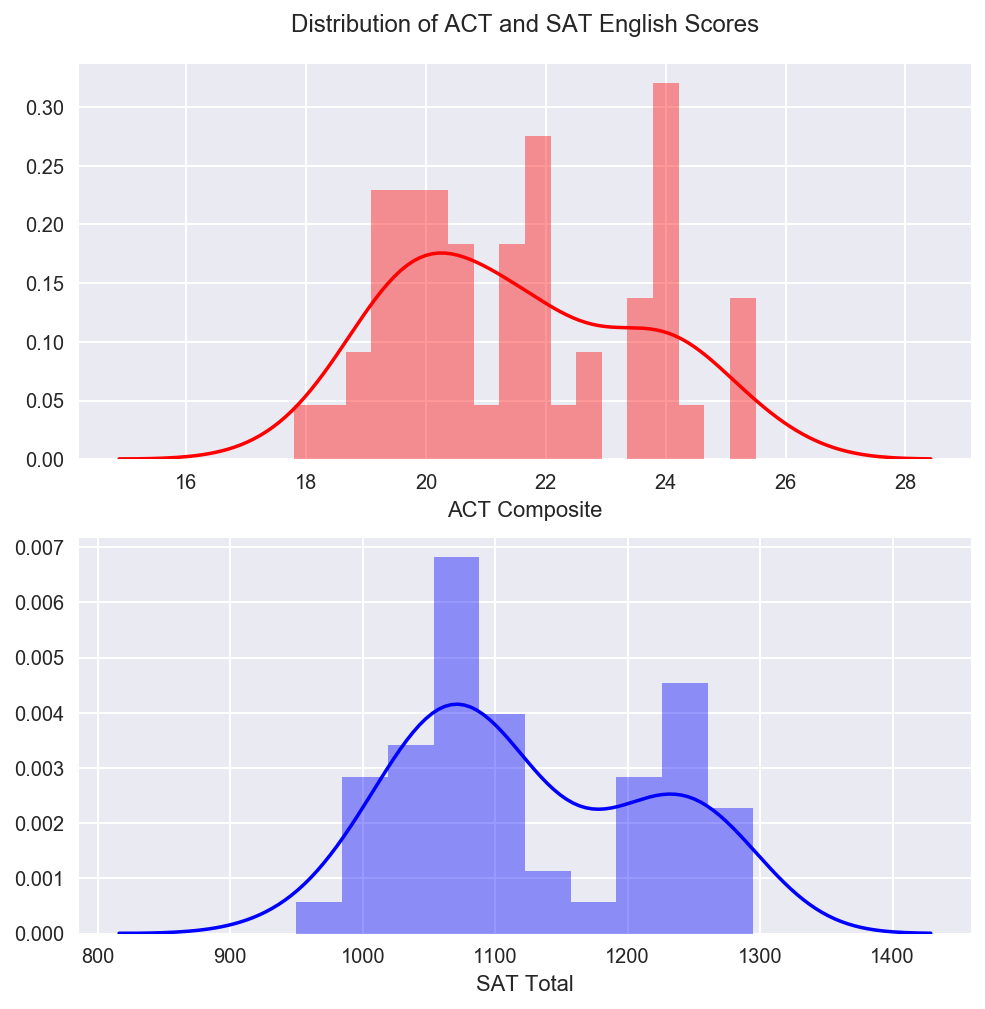

In [24]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 8))
sns.distplot(exam_data['ACT Composite'],
             bins=18, kde=True, color='Red', ax=ax1)
sns.distplot(exam_data['SAT Total'],
             bins=10, kde=True, color='Blue', ax=ax2)
plt.title("Distribution of ACT and SAT English Scores", y = 2.25);

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


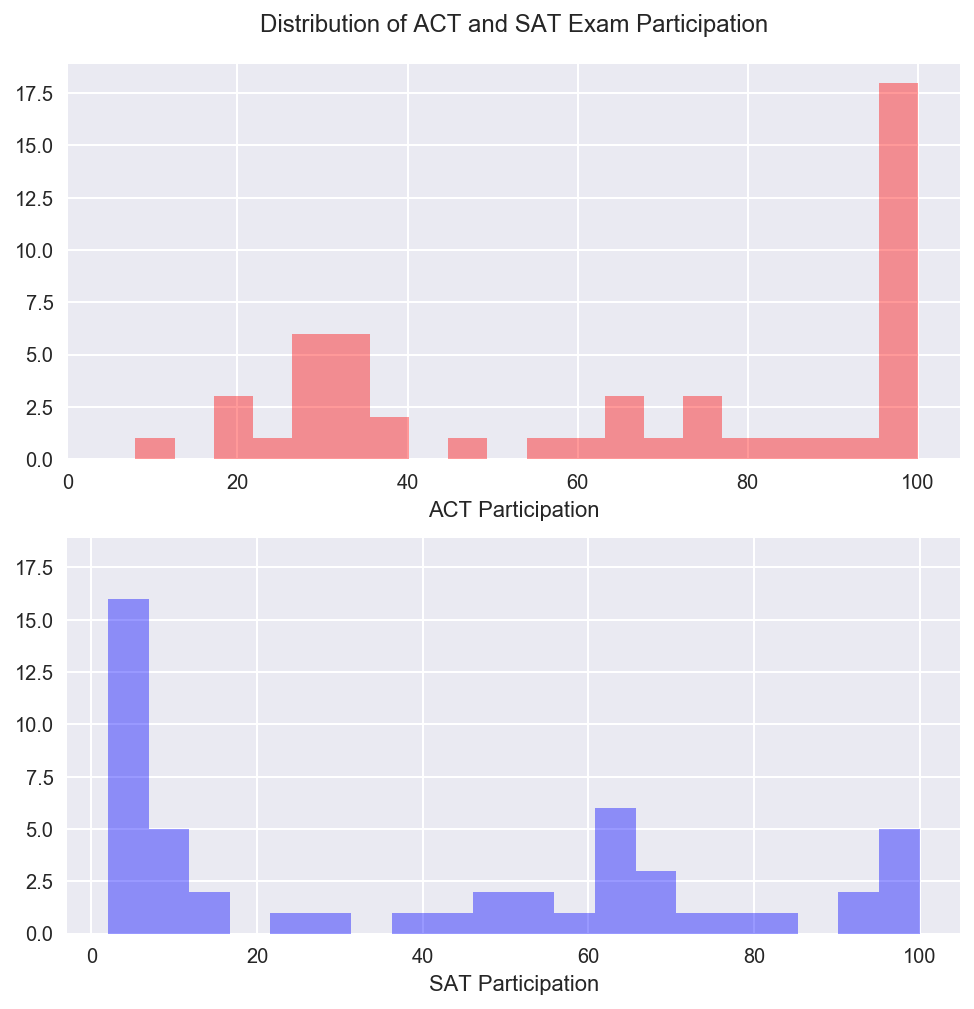

In [25]:
fig, (ax1, ax2) = plt.subplots(2, sharey = True, figsize = (8, 8))
sns.distplot(exam_data['ACT Participation'],
             bins=20, kde=False, color='Red', ax=ax1)
sns.distplot(exam_data['SAT Participation'],
             bins=20, kde=False, color='Blue', ax=ax2)
ax1.set_xlim([0, 105])
plt.title("Distribution of ACT and SAT Exam Participation", y = 2.25);

##### 17. Plot the Math(s) distributions from both data sets.

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


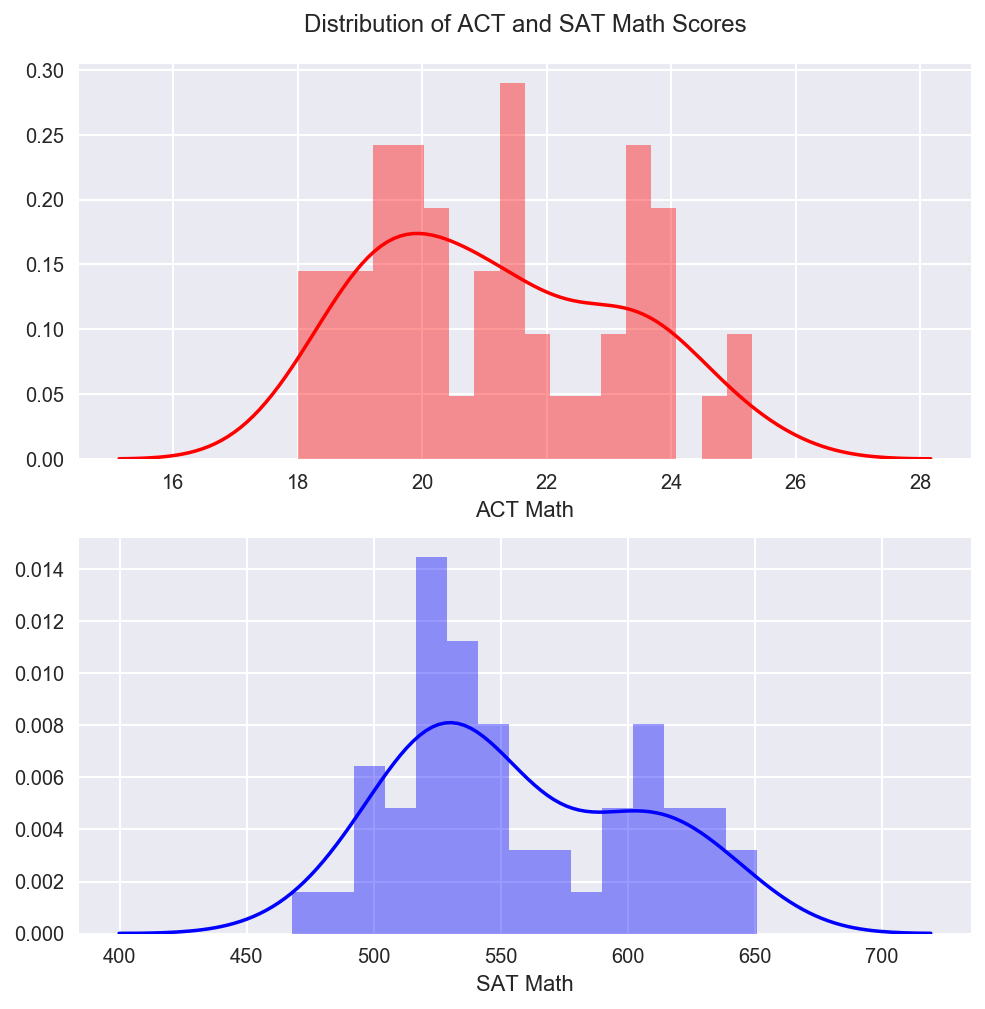

In [26]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 8))
sns.distplot(exam_data['ACT Math'],
             bins=18, kde=True, color='Red', ax=ax1)
sns.distplot(exam_data['SAT Math'],
             bins=15, kde=True, color='Blue', ax=ax2)
plt.title("Distribution of ACT and SAT Math Scores", y = 2.25);

##### 18. Plot the Verbal distributions from both data sets.

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


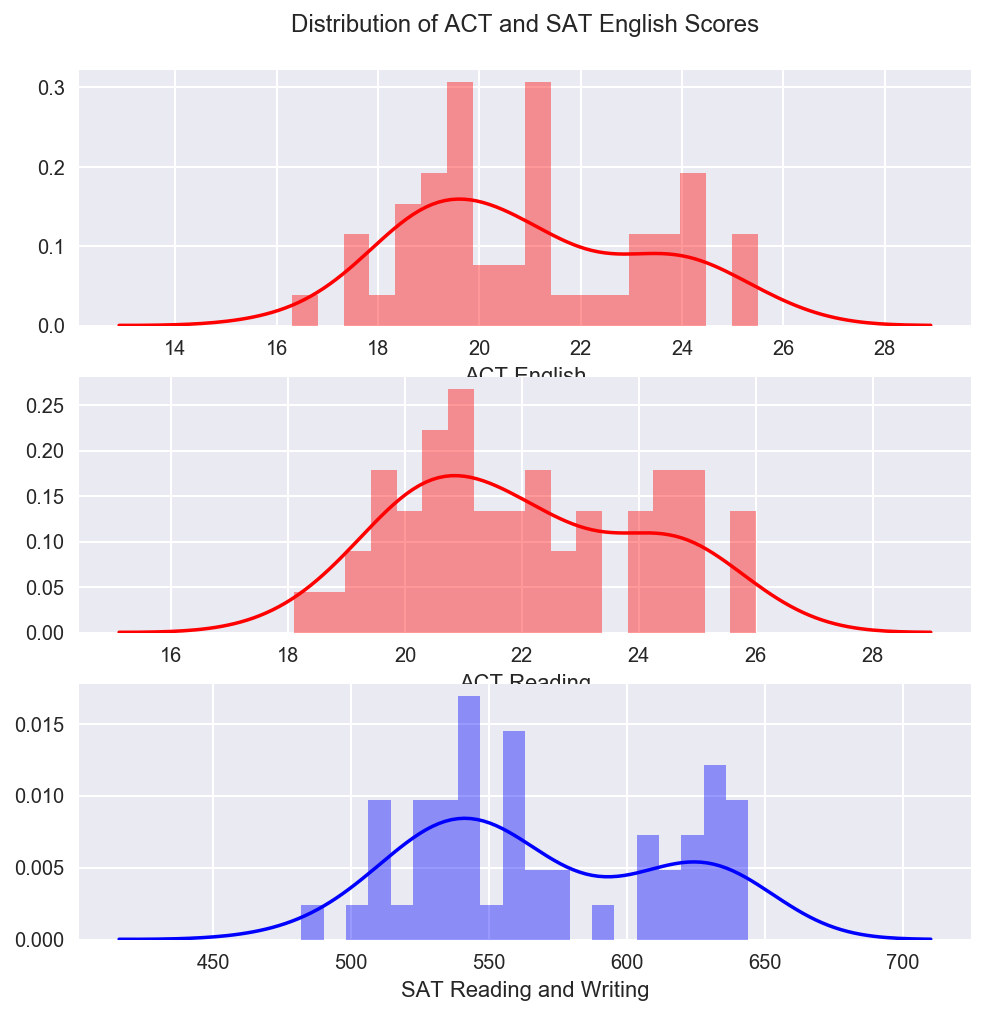

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (8, 8))
sns.distplot(exam_data['ACT English'],
             bins=18, kde=True, color='Red', ax=ax1)
sns.distplot(exam_data['ACT Reading'],
             bins=18, kde=True, color='Red', ax=ax2)
sns.distplot(exam_data['SAT Reading and Writing'],
             bins=20, kde=True, color='Blue', ax=ax3)
plt.title("Distribution of ACT and SAT English Scores", y = 3.5);

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In accordance with the Central Limit Theorem, the common assumption is that the normalized set of our independent variables should approach a normal distribution.

##### 20. Does this assumption hold true for any of our columns? Which?

In [28]:
# Normal tests for numerical columns not including standard deviation columns
print(stats.normaltest(exam_data['ACT Participation']))
print(stats.normaltest(exam_data['ACT English']))
print(stats.normaltest(exam_data['ACT Math']))
print(stats.normaltest(exam_data['ACT Reading']))
print(stats.normaltest(exam_data['ACT Science']))
print(stats.normaltest(exam_data['ACT Composite']))
print(stats.normaltest(exam_data['SAT Participation']))
print(stats.normaltest(exam_data['SAT Reading and Writing']))
print(stats.normaltest(exam_data['SAT Math']))
print(stats.normaltest(exam_data['SAT Total']))

NormaltestResult(statistic=72.50510406893655, pvalue=1.8018419611696254e-16)
NormaltestResult(statistic=4.945616782086351, pvalue=0.08434764489205682)
NormaltestResult(statistic=6.547294554392776, pvalue=0.03786805958606832)
NormaltestResult(statistic=6.248639549660324, pvalue=0.04396683079879635)
NormaltestResult(statistic=5.501326521192349, pvalue=0.0638854744336635)
NormaltestResult(statistic=6.557389886662569, pvalue=0.03767739587231253)
NormaltestResult(statistic=24.844012826931053, pvalue=4.028943345766873e-06)
NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584)
NormaltestResult(statistic=5.762201767738943, pvalue=0.056072998982864684)
NormaltestResult(statistic=9.607185954097002, pvalue=0.008200230814088539)


Null hypothesis: The numeric column data is normally distributed.

Alternative hypothesis: On account of all score columns sharing a bimodal distribution shape, the score columns are not normally distributed. The lack of any particular shape for the participation columns extends the alternative hypothesis to those columns as well.

Assessing this claim with an alpha value of .05 using stats.normaltest(), in order to reject the null hypothesis, we would require the p-values to exceed .05, preferably by a substantial margin.

For the participation rates, we reject the null hypothesis on the grounds of the p-value exceeding the acceptable margin of .05. The ACT and SAT p-values respectively come out to 1.802 and 4.039 respectively. Thus we accept the alternative, that they are not normally distributed.

The test score columns are a different story altogether. All the distribution plots for them across the board have the same bimodal shape with a sharp dip in density between the larger and lower scoring group and the somewhat smaller, higher scoring group. While this would seem to support our alternative hypothesis, p-value testing returns the following results:

* ACT English: .084
* ACT Math: .038
* ACT Reading: .044
* ACT Science: .064
* ACT Composite: .038


* SAT Reading and Writing: .001 
* SAT Math: .056
* SAT Total: .008

From this we can see that the null hypothesis does indeed hold true for most of our columns, and the remaining ones are remarkably close to our cutoff of .05. In the case of the ACT's Math, Reading, and Composite distributions, we accept the null hypothesis. For the SAT's Reading & Writing and Total columns, we also accept the null hypothesis. In the cases of the remaining columns (ACT English and Science an SAT Math), the values are too close to the cutoff to make any bold assertions.

It is also worth including that over-interpreting p-values as a measure of predictive error can be misleading. To further clarify, a p-value of .05 has an error rate of at least 23% (and typically close to 50%) and a p-value .07 has an error rate of 7% (and typically close to 15%)*. All of this is to say that just because the p-values indicate a normal distribution for the columns discussed, the onus is on the interpreter of the data to maintain a healthy dose of skepticism.

*Thomas SELLKE, M. J. BAYARRI, and James O. BERGER, Calibration of p Values for Testing Precise Null Hypotheses, The American Statistician, February 2001, Vol. 55, No. 1

##### 21. Plot some scatterplots examining relationships between all variables.

In [29]:
# Plotting the relationship between all columns. Takes a minute or two.
sns.pairplot(exam_data);

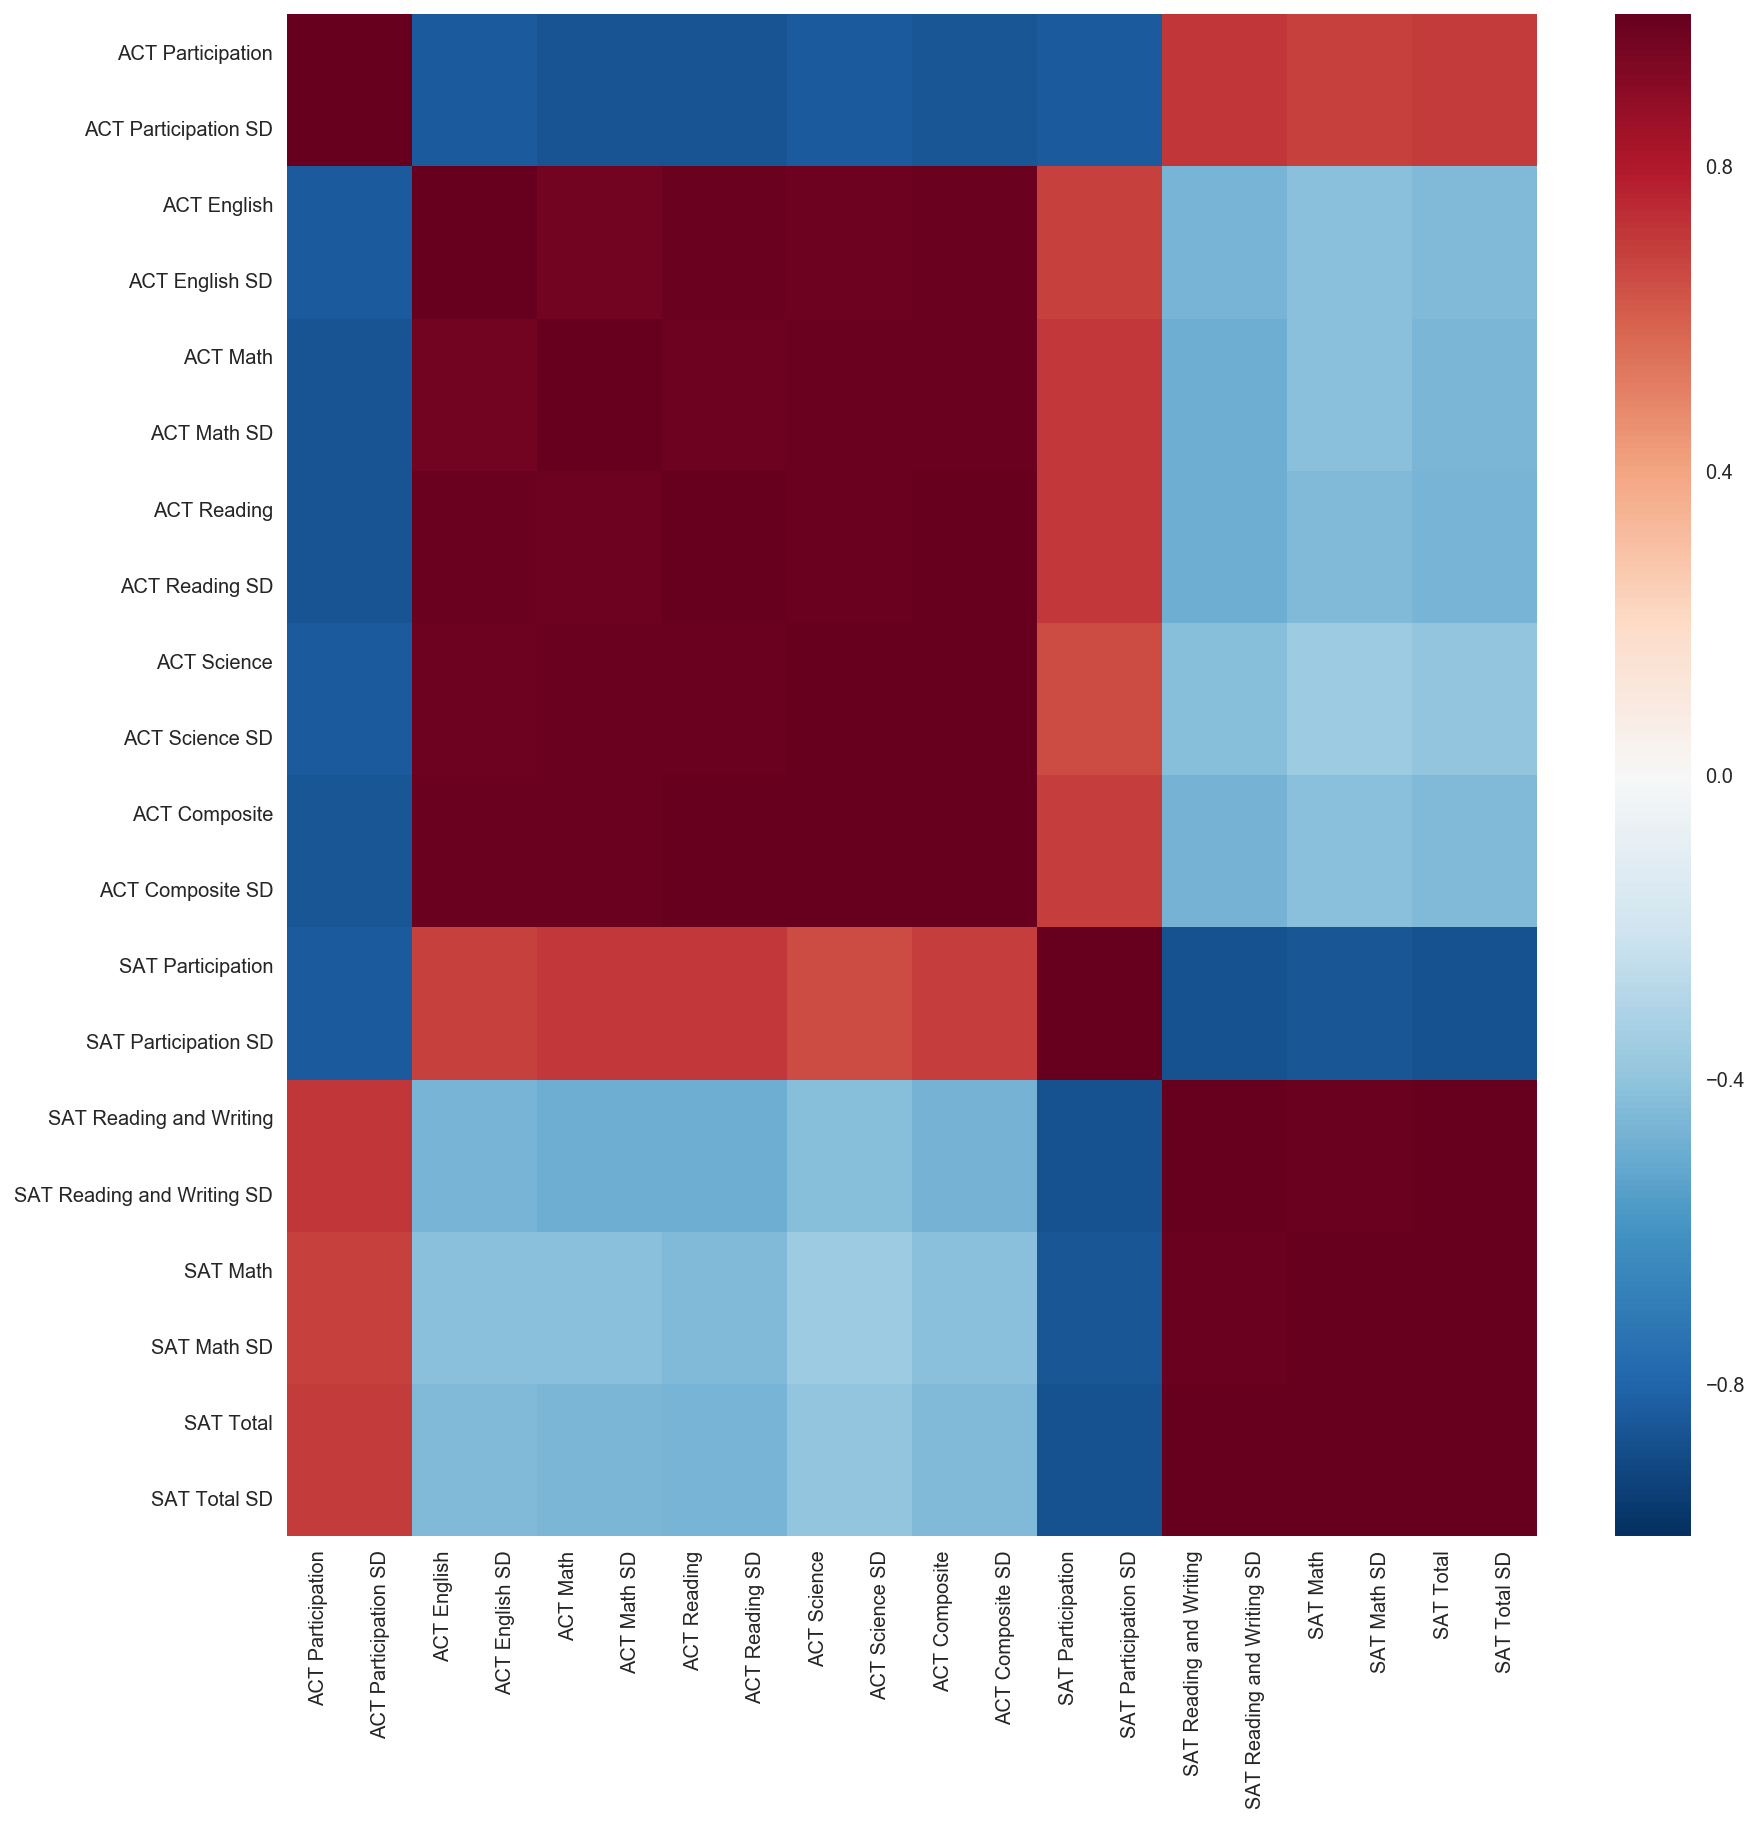

In [30]:
# Heatmap of correlation between variables
fig = plt.figure(figsize=(14,14))
sns.heatmap(exam_data.corr());

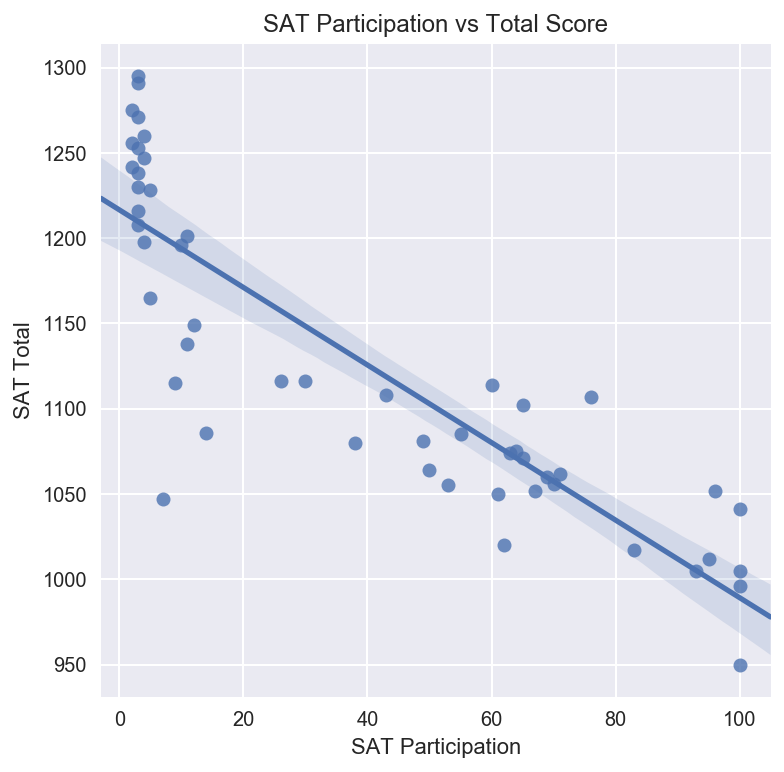

In [31]:
fig = plt.figure(figsize=(6,6))
sns.regplot(exam_data['SAT Participation'], exam_data['SAT Total'])
plt.title('SAT Participation vs Total Score');

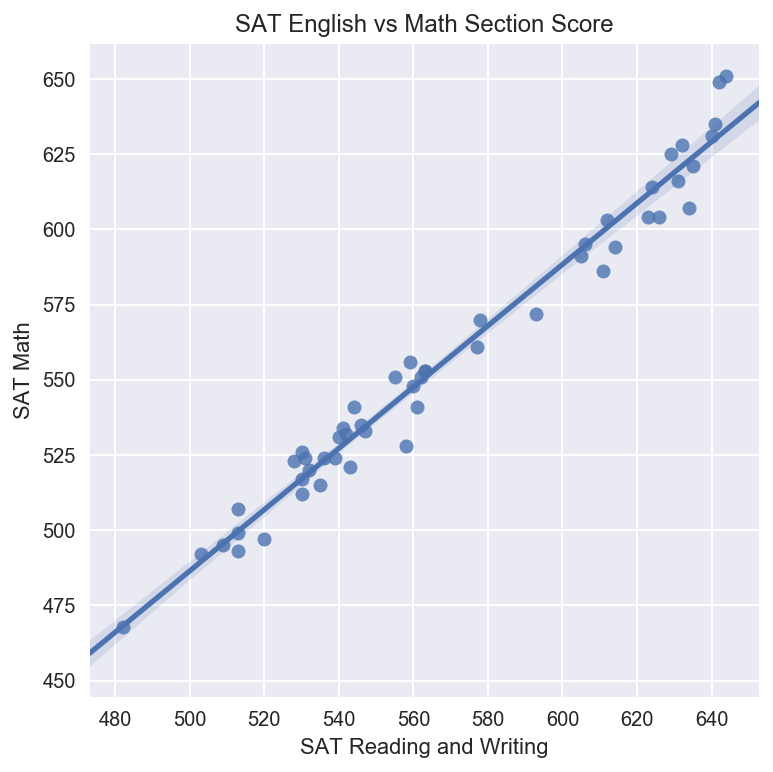

In [32]:
fig = plt.figure(figsize=(6,6))
sns.regplot(exam_data['SAT Reading and Writing'], exam_data['SAT Math'])
plt.title('SAT English vs Math Section Score');

##### 22. Are there any interesting relationships to note?

Within the domain of each exam, the test scores are similar enough in distribution to all show a tight positive correlation with respect to one another. Despite the distribution shapes being almost identical between the ACT and SAT scores per section, the correlation is not immediately apparent in the scatterplots of their respective tests in relation to each other. This is likely due to the differences in scoring. I posit that if the scales were normalized to some common measure, we would find the same sort of correlation between SAT scores and ACT scores regardless of which exam subsection is in question.

Another relationship to note is that when participation rate is lower, average scores are higher. This is unsurprising, as a low participation rate would mean that students opt to take an exam rather than mandated or expected to. When such is the case, it would be the students who prepare and are motivated to do well who choose to participate, thereby setting the bar higher than if the whole population of a state were tested.

##### 23. Create box plots for each variable. 

/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


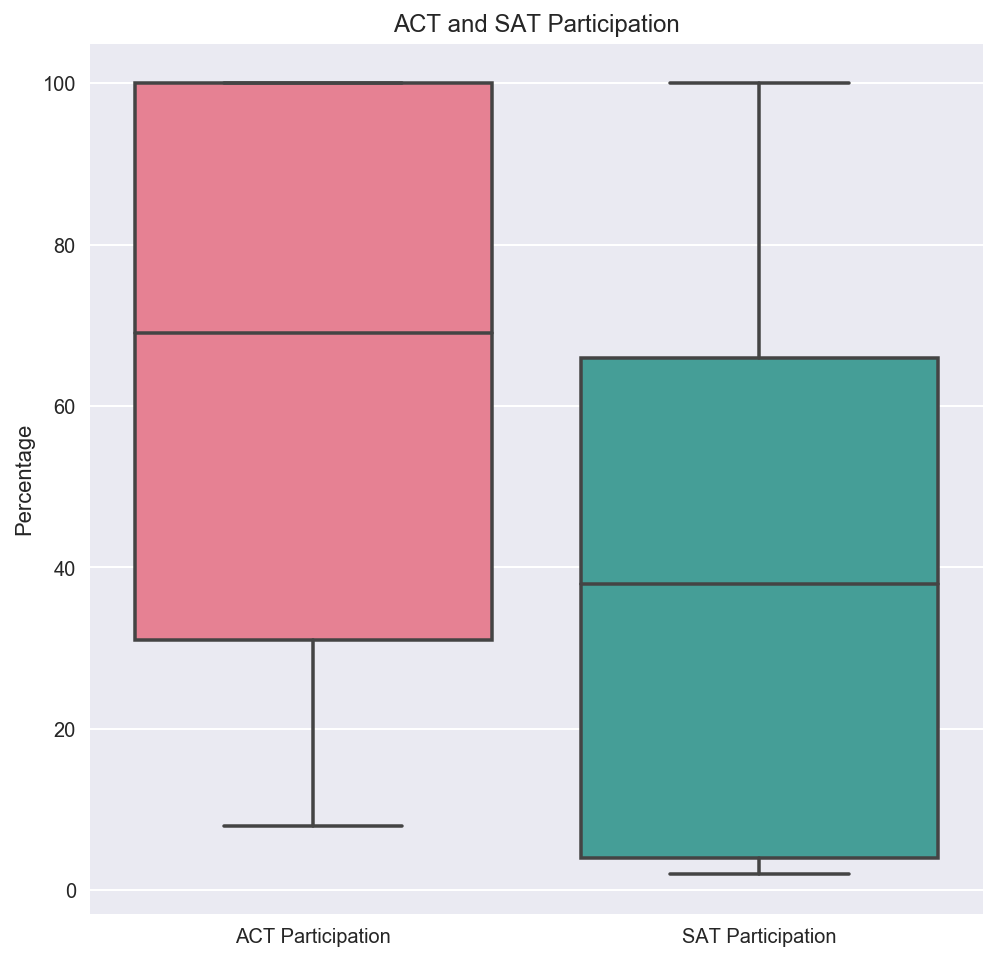

In [33]:
# Participation box plots
fig = plt.figure(figsize=(8,8))
sns.boxplot(exam_data[['ACT Participation','SAT Participation']], palette="husl")
plt.ylabel('Percentage')
plt.title('ACT and SAT Participation');

/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


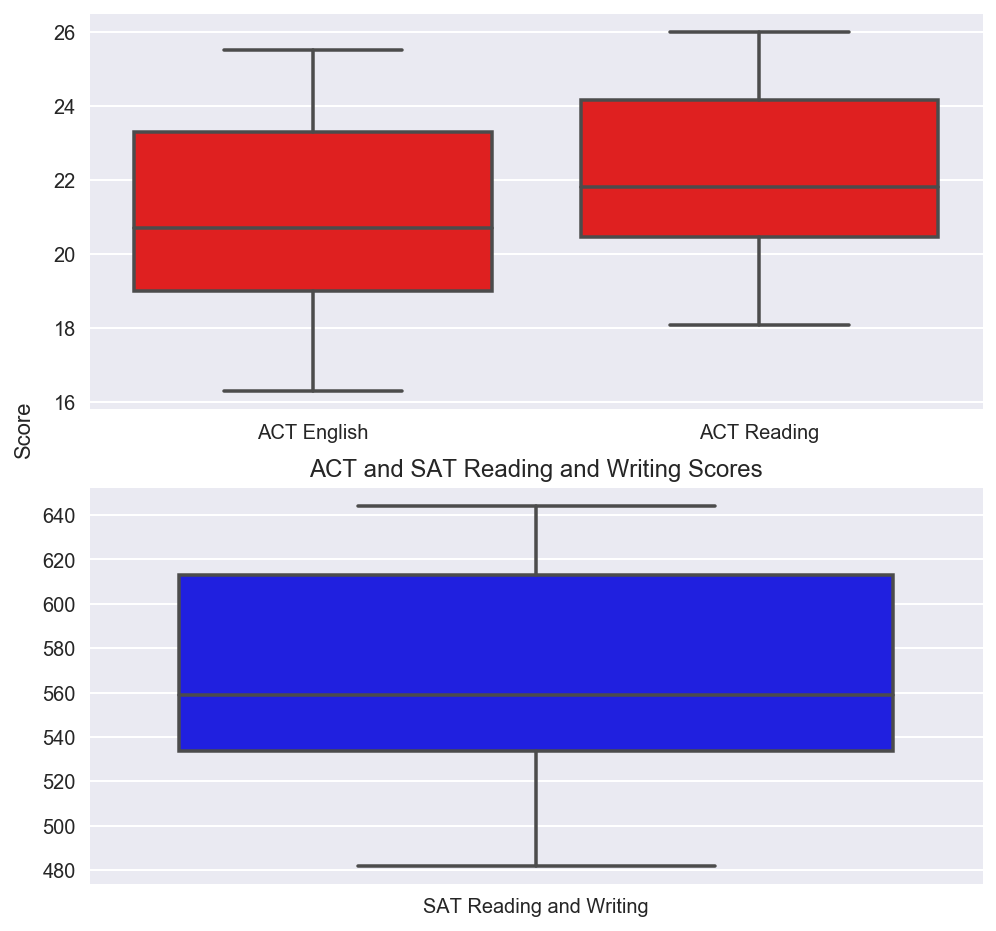

In [34]:
# English box plots
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 8))
sns.boxplot(exam_data[['ACT English', 'ACT Reading']], color='Red', ax=ax1)
sns.boxplot(exam_data[['SAT Reading and Writing']], color='Blue', ax=ax2)
plt.ylabel('Score', y=1.15)
plt.title('ACT and SAT Reading and Writing Scores');

/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


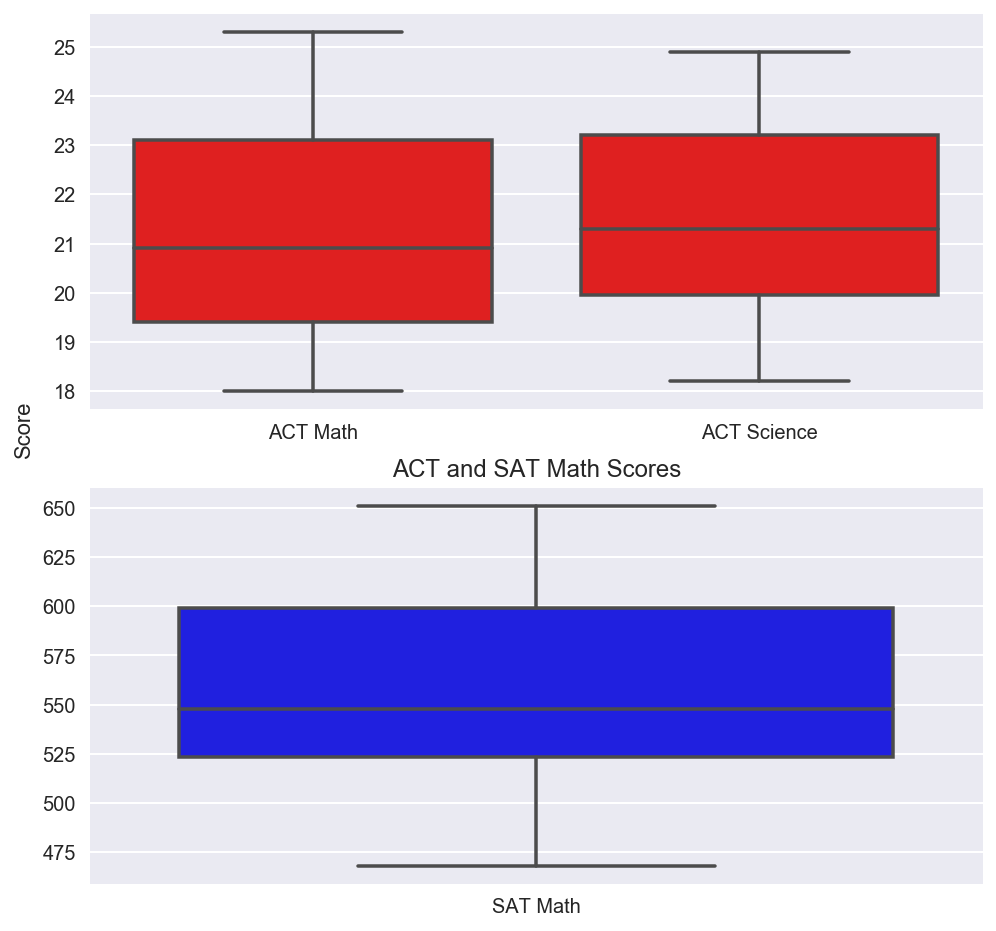

In [35]:
# Math and science box plots
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 8))
sns.boxplot(exam_data[['ACT Math', 'ACT Science']], color='Red', ax=ax1)
sns.boxplot(exam_data[['SAT Math']], color='Blue', ax=ax2)
plt.ylabel('Score', y=1.15)
plt.title('ACT and SAT Math Scores');

/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


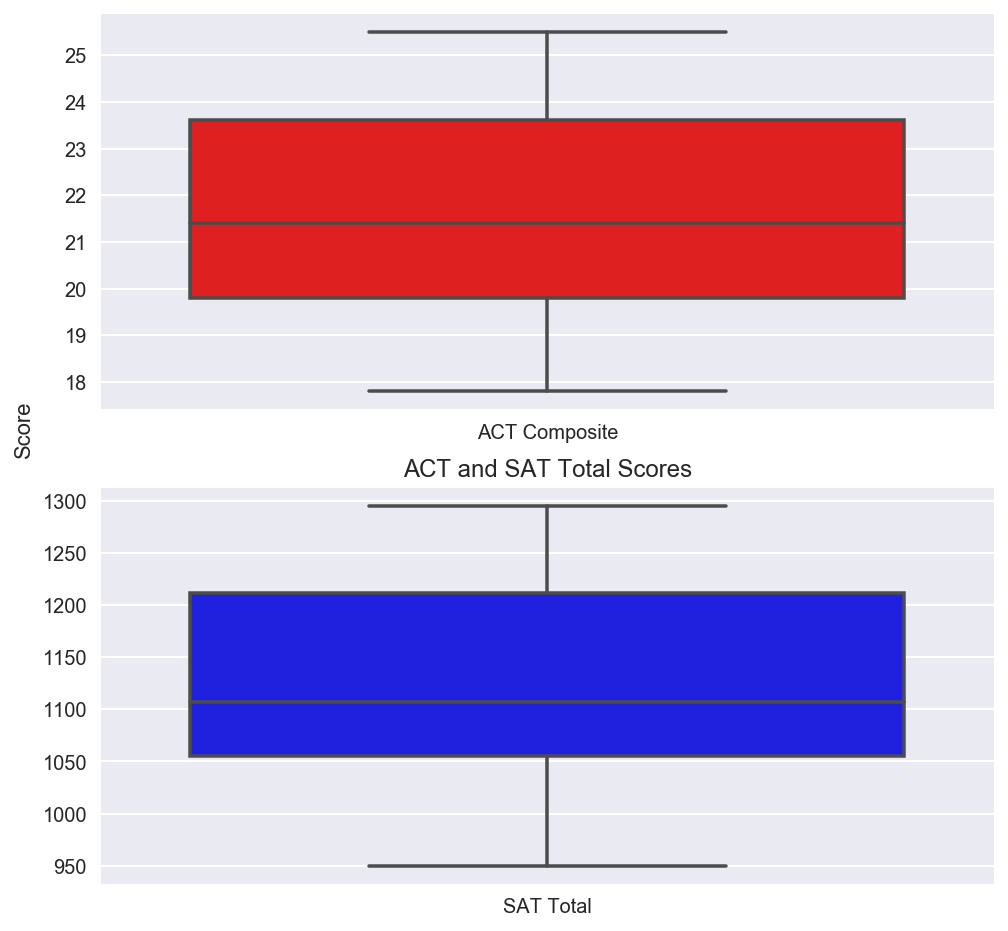

In [36]:
# Total score box plots
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 8))
sns.boxplot(exam_data[['ACT Composite']], color='Red', ax=ax1)
sns.boxplot(exam_data[['SAT Total']], color='Blue', ax=ax2)
plt.ylabel('Score', y=1.15)
plt.title('ACT and SAT Total Scores');

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

Scores:

* Shape - Bimodal, but normal according to p-test for the most part. Remarkably similar, not only across each subsection per exam, but across exams as well.

* Center - For the ACTs, the composite mean falls at 21.5. On the SAT scale, the total mean is 1126.1. These vary by state and exam subsection, but the gist is the same across the board

* Spread - Both skew very slightly right. There tends to be about 2/3 of the population at and slightly left of center, followed by a sharp drop, and wrapped up by a strong set of the remaining 1/3 right of center. This holds true across the board by subsection and exam.


Participation:

* Shape - No shape. Both exams have their share of 0 values and 100 values.

* Center - For SAT the mean is 39.8. For the ACT the mean is 65.3

* Spread - SAT skews left, ACT skews right

In [37]:
exam_data['SAT Participation'].mean()
exam_data['ACT Participation'].mean()
exam_data['ACT Composite'].mean()
exam_data['SAT Total'].mean()

1126.0980392156862

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

The categories that can be said to be statistically related are as follows:

1) Participation rate and average performance across all tests - inverse

2) The distributions of all score categories for both exams in terms of shape - bimodal, but still normal accoring to p-test

3) SAT and ACT participation - inverse

4) Scores per section - positive

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

Null Hypothesis: There is no correlation between ACT and SAT participation on a state level.
Alternative: In states where SAT participation is higher, ACT participation is lower.

#totallymisunderstoodquestion

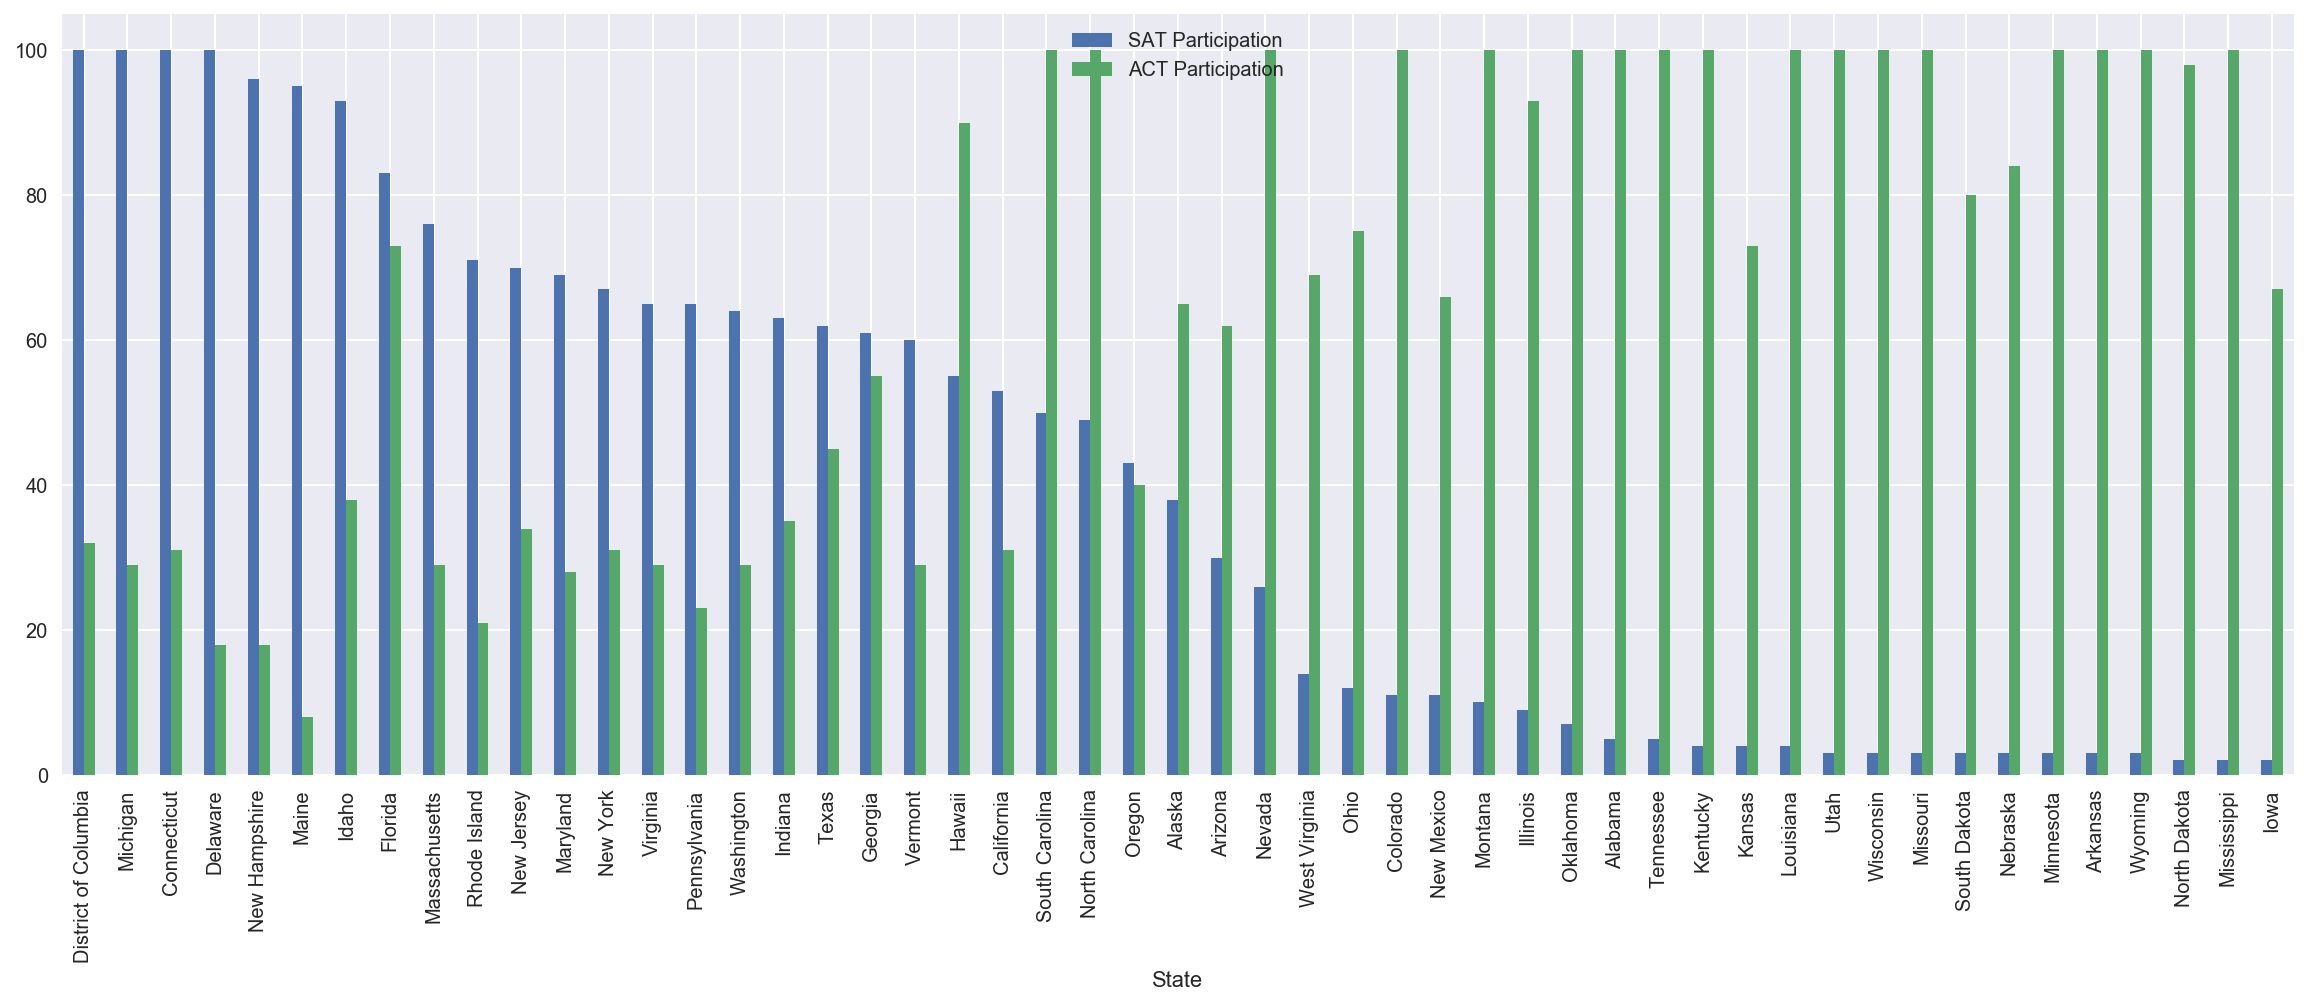

In [38]:
# Reduce sorted dataframe from earlier to only contain necessary columns
sat_sort_set = sat_sort_set[['State', 'SAT Participation', 'ACT Participation']]

# Plot bar chart of ACT vs SAT participation by state, in descending order of SAT scores
sat_sort_set.set_index('State').plot.bar(figsize=(20,7));

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

The formula for calculating confidence intervals is as follows:
$$\text{CI} = \bar{x} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$$
the x with the bar at the begining is our population mean. For a 95% confidence interval, our z-value must be 1.96. The final fraction is our standard error of the mean which we find by dividing the standard error by the square root of the population count. On a side note, since we don't have explicit n-values for each measurement other than just the number of rows per column, I am left to wonder if this test will actually yield meaningful results.

In [39]:
# z-value for 95% confidence
z = 1.96

# Lower CI, 51 being the number of rows
lower_act_ci = exam_data['ACT Participation'].mean() - z * (sd['ACT Participation'] / sqrt(51))
lower_sat_ci = exam_data['SAT Participation'].mean() - z * (sd['SAT Participation'] / sqrt(51))

# Upper CI, 51 being the number of rows
upper_act_ci = exam_data['ACT Participation'].mean() + z * (sd['ACT Participation'] / sqrt(51))
upper_sat_ci = exam_data['SAT Participation'].mean() + z * (sd['SAT Participation'] / sqrt(51))

# Print confidence intervals for exam participation. Both have been tested and verified against the
# stats.norm.interval() function.
print('ACT Participation Confidence Intervals: (', lower_act_ci, ',', upper_act_ci, ')')
print('SAT Participation Confidence Intervals: (', lower_sat_ci, ',', upper_sat_ci, ')')

ACT Participation Confidence Intervals: ( 56.52060109975314 , 73.98920282181548 )
SAT Participation Confidence Intervals: ( 30.217467067592388 , 49.390376069662516 )


We are 95% confident that the average participation on the ACTs falls within the range of ~56.5% and ~74.0%.
We are also 95% confident that the average participation on the SATs falls within the range of ~30.2% and ~49.4%.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

Not particularly. Given that both participation distributions were far from normal with relatively large standard deviations, and adding on that we wanted a 95% confidence interval, it is to be expected that the range should be so wide (~20%)

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

If we assume that the tests are quantifying the same metric in the same way, it is possible to normalize the scoring systems on a common scale and compare the two. The expectation in that case would be that they should correlate very strongly (a supposition supported by noting the similar shape of the distributions of scores for both sets). The assumption unfortunately seems to support its conclusion in a self-fulfilling manner.

For the relationship to be meaningful, the norming method would have to be impartial. One way to go about assessing the correlation in a less biased way might be to norm the scales would be to evaluate each exam's score set independently after putting them on a similar scale. An example will lend clarity:

SAT score ranges for each section are in the range of 200 to 800. By subtracting each score by 200, the range becomes 0 to 600. We can then divide by 6 to put all the scores for a section in the range of 0 to 100. For ACTs which are scored between 1 and 36, we would subtract 1, divide by 35, and multiply by 100. The distributions of the scores could then be evaluated on the same scale. This method does not normalize the scale of each exam *score* with respect to the other, but it does allow the distributions themselves to be evaluated on a common scale. There may be an offset between the two score distributions which would have be taken into account, but it would not force a corelation between the two sets.

The question at this point really is 'why?' The only metric that would preseve its significance through the transformation would seem to be the relative distributions of the sets, but that can already be evaluated on each scale independently and then compared (as we have done above). Beyond distribution, correlating other aspects of the SAT and ACT scores would demand that we make assumptions that could easily contaminate our data and thus our conclusions.

TL;DR - The only meaningful correlation that can be made between the two sets with the data we have is about distributions.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

We can statistically infer based on the distributions of the variables and the participation rates. Beyond that, we lack sufficient data to draw any conclusions without making wild assumptions that could, in many cases, taint the conclusions we draw.

The only data we have that is common to both sets is 'States' and 'Participation'. If we had the number of data points per data point, we could deductively increase the richness of our dataset by extrapolating a national aggregate for the SAT set like the one the ACT came with, but again, we suffer from a lack of information that is common to both sets or is objectively quantified on a non-arbitrary scale.